<a href="https://colab.research.google.com/github/donchanee/programmers_kdt_II/blob/week3%EC%84%A4%EB%8F%99%EC%B0%AC/4.%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
tt_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

In [ ]:
tt_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 각 Coulum의 데이터 타입 확인하기

tt_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [ ]:
# 데이터 전체 정보를 얻는 함수 : .describe()

tt_df.describe()  # 수치형 데이터에 대한 요약만을 제공합니다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
tt_df.corr()  

# 인과성이 있다는 것은 아님. 높은 등급에 앉았다고 -> 생존한 확률이 올라간 것은 아님

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
# 결측치를 확인합니다.

tt_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

In [ ]:
## 생존자, 사망자 명수는?

tt_df['Survived'].sum()

342

In [ ]:
tt_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

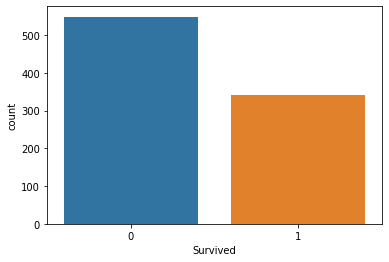

In [ ]:
sns.countplot(x='Survived', data=tt_df)
plt.show()

In [ ]:
# Pclass에 따른 인원 파악

tt_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
tt_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

# Survived가 1인 sum

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
tt_df_surv = tt_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

# 생존 비율

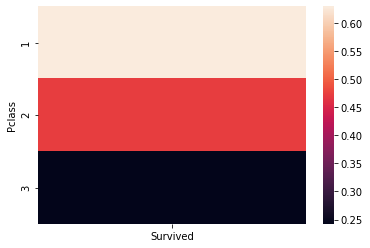

In [ ]:
 # 히트맵 사용 시각화
 
 sns.heatmap(tt_df_surv)
 plt.show()

In [ ]:
tt_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

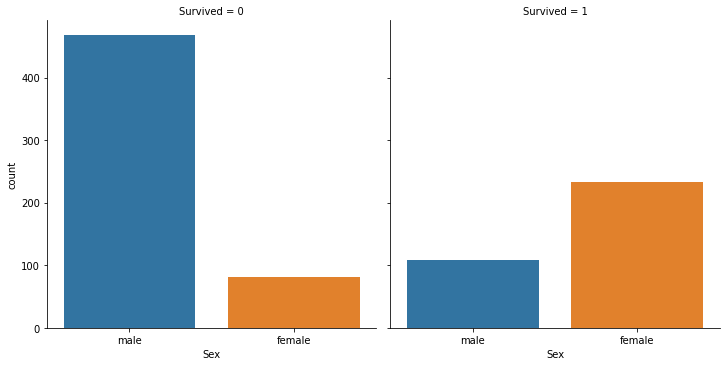

In [ ]:
sns.catplot(x='Sex', col='Survived', kind='count', data=tt_df)

In [ ]:
# 결측치가 존재하는 Age에 대해 분석을 합니다.

tt_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

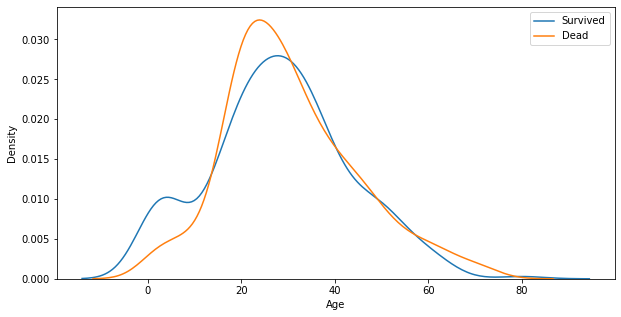

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=tt_df[tt_df.Survived==1]['Age'], ax=ax)
sns.kdeplot(x=tt_df[tt_df.Survived==0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()

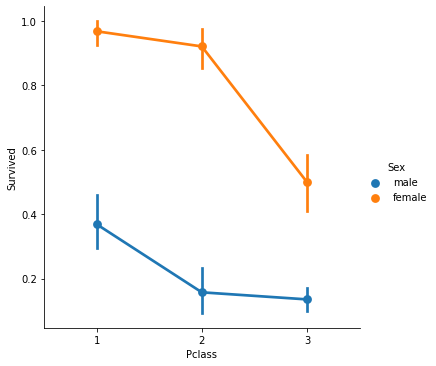

In [ ]:
# Sex + Pclass vs Survived

sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=tt_df)
plt.show()

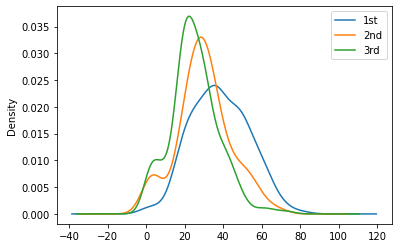

In [ ]:
# Age + Pclass

tt_df['Age'][tt_df.Pclass == 1].plot(kind='kde')
tt_df['Age'][tt_df.Pclass == 2].plot(kind='kde')
tt_df['Age'][tt_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st','2nd','3rd'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:
1. 데이터를 톺아봅시다.  
    - 각 데이터는 어떤 자료형을 가지고 있나요?  
    - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?  
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할 수록 좋습니다 ex) *Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!*
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.  
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

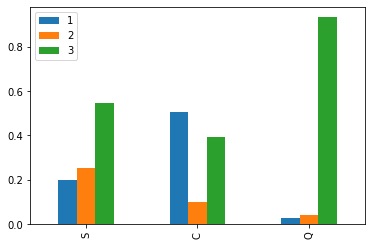

In [ ]:
# 1등석, 2등석, 3등석과 승선한 위치의 상관관계? (승객의 지위, 부유한 지역 판단하기)

Pclass1 = tt_df[tt_df['Embarked']=='S']['Pclass'].value_counts()
Pclass2 = tt_df[tt_df['Embarked']=='C']['Pclass'].value_counts()
Pclass3 = tt_df[tt_df['Embarked']=='Q']['Pclass'].value_counts()

S_people = tt_df[tt_df['Embarked']=='S']['PassengerId'].count()
C_people = tt_df[tt_df['Embarked']=='C']['PassengerId'].count()
Q_people = tt_df[tt_df['Embarked']=='Q']['PassengerId'].count()

df = pd.DataFrame([Pclass1 / S_people, Pclass2 / C_people, Pclass3 / Q_people])
df.index = ['S', 'C', 'Q']

df.plot(kind='bar')
plt.show()

# Q 지역은 3등석의 비율이 제일 높고 1등석의 비율은 C지역이 제일 높습니다.

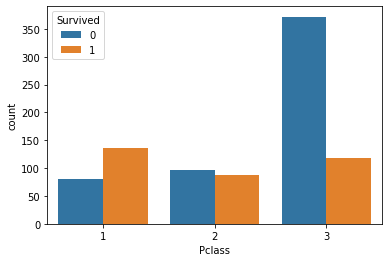

In [ ]:
# 클래스와 생존률의 상관관계? (그렇다면 부의 척도가, 생존률에도 영향을 미치는가)

sns.countplot(data=tt_df, x='Pclass', hue='Survived')
plt.show()

# 질문 1. 이 플롯과 요 바로 위 플롯을 합쳐서 표현하고 싶을 때, 어떻게 그려야하는지!

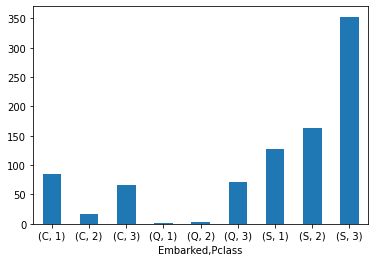

In [ ]:
# 승선한 지역과 클래스간의 플롯 (S가 제일 많이 승선했고, Q는 3등석에 몰려있다.)

tt_df.groupby(['Embarked','Pclass'])['PassengerId'].count().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()


### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

* * * 

## Netflix Movies and TV Shows 에 대한 데이터를 가지고 진행하였습니다.


In [161]:
netflix = pd.read_csv("./netflix_titles.csv")

netflix.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [185]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [187]:
netflix.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

### 1. 넷플릭스에는 최근에 나온 영화 및 TV쇼가 많이 등록되어 있을까 아니면 옛날 영화가 많을까에 대한 추론을 해보았습니다.

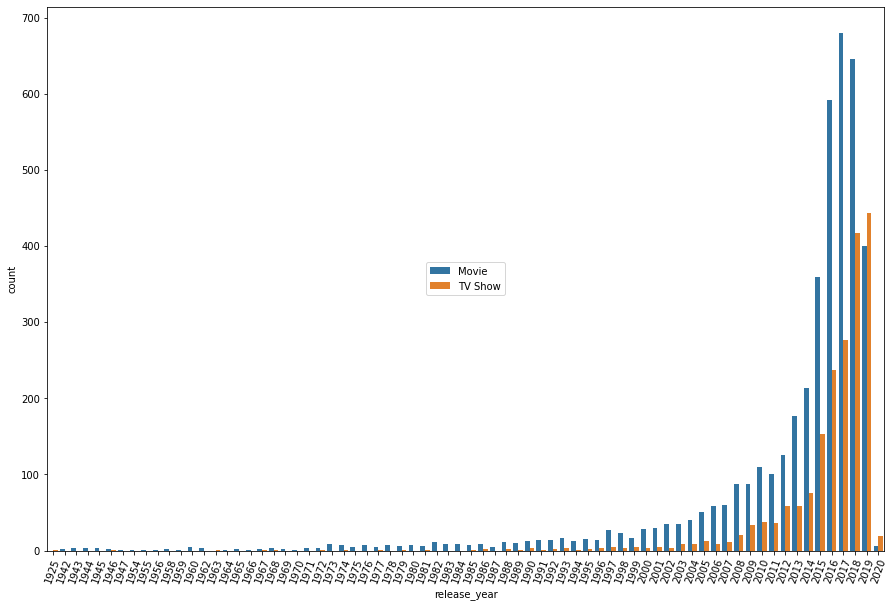

In [228]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(ax = ax, data = netflix, x = 'release_year', hue="type")
plt.legend(loc='center')
plt.xticks(rotation='70')
plt.show()

### 아마존의 심의등급은 아래와 같습니다.

In [189]:
ratings_data = { 'TV-PG': 7,'TV-MA': 18,'TV-Y7-FV': 7,'TV-Y7': 7,
            'TV-14': 16,'R': 18,'TV-Y': 0,'NR': 18,'PG-13': 13,
            'TV-G': 0,'PG': 7,'G': 0,'UR': 18,'NC-17': 18}

ratings = pd.Series(ratings_data, name='recommand_age')
ratings

TV-PG        7
TV-MA       18
TV-Y7-FV     7
TV-Y7        7
TV-14       16
R           18
TV-Y         0
NR          18
PG-13       13
TV-G         0
PG           7
G            0
UR          18
NC-17       18
Name: recommand_age, dtype: int64

In [193]:
netflix = pd.merge(netflix, ratings, left_on='rating', right_index=True)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,recommand_age
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,7
30,80988892,Movie,Next Gen,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018,TV-PG,106 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When lonely Mai forms an unlikely bond with a ...,7
43,80095641,Movie,Elstree 1976,Jon Spira,"Paul Blake, Jeremy Bulloch, John Chapman, Anth...",United Kingdom,"September 6, 2016",2015,TV-PG,102 min,Documentaries,Then and now footage of bit players who appear...,7
48,81016045,Movie,One Day,Banjong Pisanthanakun,"Chantavit Dhanasevi, Nittha Jirayungyurn, Thee...",Thailand,"September 5, 2018",2016,TV-PG,135 min,"Dramas, International Movies, Romantic Movies",When his colleague (and crush) temporarily los...,7
67,80128317,TV Show,The Eighties,NaN,NaN,United States,"September 30, 2018",2016,TV-PG,1 Season,Docuseries,This nostalgic documentary series relives the ...,7


### 2. 어린이를 위한 영화 및 TV 쇼는 얼마나 존재할지, 얼마나 키즈-프렌들리한 어플리케이션일지 알아보겠습니다.

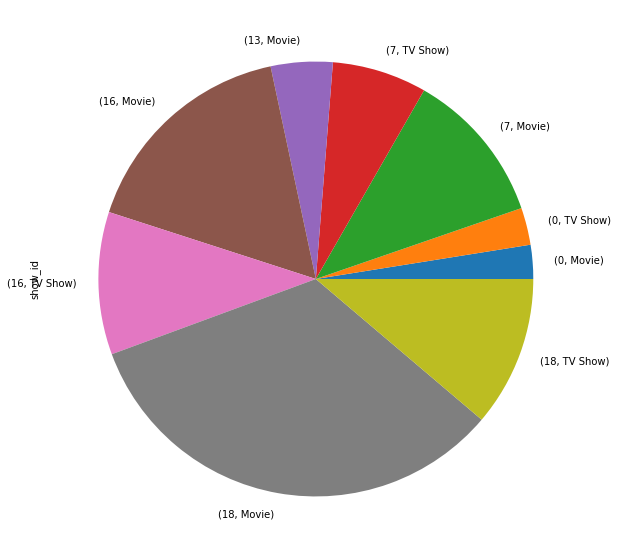

In [240]:
data_by_age = netflix.groupby(["recommand_age",'type'])['show_id'].count()

data_by_age.plot.pie(figsize=(15,10))
plt.show()

### 3. 어느지역이 제일 많은 영상을 보유하고 있는가?

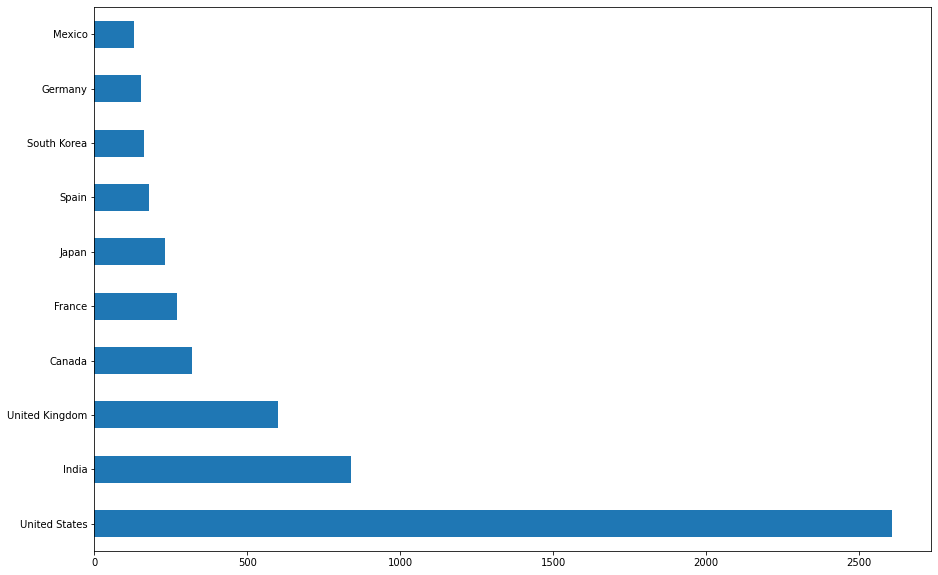

In [244]:
import collections as c

country_count = c.Counter(", ".join(netflix['country'].dropna()).split(", "))
top_ten_countries = country_count.most_common(10)
rank = {}
for x in top_ten_countries:
  rank[x[0]] = x[1]
rank_series = pd.Series(rank)

rank_series.plot(kind='barh', figsize=(15,10))
plt.show()